In [1]:
import pandas as pd
import numpy as np

import re
import string

import spacy

import gensim
from gensim import corpora

# libraries for visualization
import pyLDAvis
import pyLDAvis.gensim_models
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [2]:
#https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/#1introduction
import numpy as np
import json
import glob

#Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

#spacy
import spacy
from nltk.corpus import stopwords

#vis
import pyLDAvis


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [3]:
import pyLDAvis.gensim_models
import pandas as pd, numpy as np

In [19]:
df=pd.read_csv('df_with Clean tweets & Product-Service Related words from website_2.csv')

In [20]:
df.columns

Index(['Unnamed: 0', 'user', 'date', 'Tweets', 'user_location', 'tweets',
       'domain', 'hosting', 'website', 'email', 'security', 'builder',
       'wordpress', 'marketing', 'service', 'app', 'SEO', 'server', 'webemail',
       'ecommerce', 'web', 'Subjectivity', 'Polarity', 'Status'],
      dtype='object')

In [21]:
df=df[['user', 'date','user_location', 'tweets','Status','Polarity']]

In [24]:
df

,user,date,user_location,tweets,Status,Polarity
0,"{'username': 'LatebirdVeloz', 'id': 2545627424...",2019-01-07 23:58:19+00:00,Riviera Maya / CDMX ???Ã½???Â« ????,go hell bob parsons spineless fuck stop cowar...,Negative,-0.4
1,"{'username': 'bonnieaskowitz', 'id': 249009736...",2019-01-07 23:57:11+00:00,NaN,thanks fire,Positive,0.2
2,"{'username': 'ANDREAG13353939', 'id': 87907853...",2019-01-07 23:56:23+00:00,"Colorado, USA",proudly presenting check let know think none g...,Positive,0.8
3,"{'username': 'GirlsinTech', 'id': 16014840, 'd...",2019-01-07 23:52:07+00:00,Global,want boss don t need go biz school entrepreneu...,Neutral,0.0
4,"{'username': 'mark_callwood', 'id': 9057451792...",2019-01-07 23:46:48+00:00,Surrey,every cunty elephant killing bob parsons hundr...,Positive,0.4
...,...,...,...,...,...,...
452315,"{'username': 'ecarlesi', 'id': 19444180, 'disp...",2022-09-23 07:50:33+00:00,"Roma, Lazio",possible threat phishing,Neutral,0.0
452316,"{'username': 'ecarlesi', 'id': 19444180, 'disp...",2022-09-23 07:55:09+00:00,"Roma, Lazio",possible threat,Neutral,0.0
452317,"{'username': 'hytyjyu', 'id': 1551087273160036...",2022-09-23 08:02:29+00:00,NaN,gamefi,Neutral,0.0
452318,"{'username': 'ARCH1V3S23', 'id': 1498900982209...",2022-09-23 08:04:14+00:00,"she/they, minor, works on Ã¢ÂÂ¡Ã¯Â¸Â",adobe express u nawt hv layer something like c...,Neutral,0.0


In [4]:
def clean_text(text ): 
    delete_dict = {sp_character: '' for sp_character in string.punctuation} 
    delete_dict[' '] = ' ' 
    table = str.maketrans(delete_dict)
    text1 = text.translate(table)
    #print('cleaned:'+text1)
    textArr= text1.split()
    text2 = ' '.join([w for w in textArr if ( not w.isdigit() and  ( not w.isdigit() and len(w)>3))])
    
    return text2.lower()

In [26]:
import nltk
nltk.download('stopwords') # run this one time

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [30]:
review_data=df.copy()

In [32]:
review_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452320 entries, 0 to 452319
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   user           452320 non-null  object 
 1   date           452320 non-null  object 
 2   user_location  307120 non-null  object 
 3   tweets         452320 non-null  object 
 4   Status         452320 non-null  object 
 5   Polarity       452320 non-null  float64
dtypes: float64(1), object(5)
memory usage: 20.7+ MB


In [33]:
df2=review_data.copy()

In [34]:
review_data=review_data[['user','date','tweets','Status','Polarity']]

In [35]:
review_data.rename(columns={'Polarity':'Score'},inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [36]:
review_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452320 entries, 0 to 452319
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   user    452320 non-null  object 
 1   date    452320 non-null  object 
 2   tweets  452320 non-null  object 
 3   Status  452320 non-null  object 
 4   Score   452320 non-null  float64
dtypes: float64(1), object(4)
memory usage: 17.3+ MB


In [40]:
review_data=df3.copy()

In [42]:
review_data.dropna(axis = 0, how ='any',inplace=True) 



review_data['tweets'] = review_data['tweets'].apply(clean_text)
review_data['Num_words_text'] = review_data['tweets'].apply(lambda x:len(str(x).split())) 

mask = (review_data['Num_words_text'] < 120) & (review_data['Num_words_text'] >=20)
df_short_reviews = review_data[mask]

print('No of Short reviews')
print(len(df_short_reviews))

No of Short reviews
30058


In [45]:
df_sampled=df_short_reviews.copy()

In [16]:
df2=review_data.copy()

In [39]:
review_data.dropna(axis = 0, how ='any',inplace=True) 






#review_data['Text'] = review_data['tweets'].apply(clean_text)
review_data['Num_words_text'] = review_data['tweets'].apply(lambda x:len(str(x).split())) 

print('-------Dataset --------')
print(review_data['Score'].value_counts())
print(len(review_data))
print('-------------------------')
max_review_data_sentence_length  = review_data['Num_words_text'].max()

mask = (review_data['Num_words_text'] < 100) & (review_data['Num_words_text'] >=20)
df_short_reviews = review_data[mask]
df_sampled = df_short_reviews.groupby('Score').apply(lambda x: x.sample(n=200000)).reset_index(drop = True)

print('No of Short reviews')
print(len(df_short_reviews))

-------Dataset --------
 0.000000    207292
 0.800000     61527
 0.500000     17010
 0.200000      9107
 0.400000      7679
              ...  
 0.049306         1
-0.191667         1
-0.223377         1
 0.514167         1
-0.553333         1
Name: Score, Length: 5863, dtype: int64
452320
-------------------------


ValueError: Cannot take a larger sample than population when 'replace=False'

In [13]:
df_short_reviews

,user,date,user_location,tweetss,tweets,Num_words_text
8,"{'username': 'ItsikRomano', 'id': 57819532, 'd...",2019-01-07 23:26:54+00:00,Montreal - Quebec - Canada,sell contact info spammers india since purcha...,sell contact info spammers india since purchas...,26
30,"{'username': 'LaDonaHarvey', 'id': 225056299, ...",2019-01-07 22:14:10+00:00,San Diego,happen last time registered domain name phone ...,happen last time registered domain name phone ...,20
47,"{'username': 'maryderrickart', 'id': 562518183...",2019-01-07 21:28:03+00:00,Canada,disgusting pos kills fun founder time boycott...,disgusting kills founder time boycott ahole kn...,26
58,"{'username': '_STD_', 'id': 480888266, 'displa...",2019-01-07 20:59:56+00:00,Nor Cal,mmanerd top three things mentioned suffice wor...,mmanerd three things mentioned suffice wordpre...,20
65,"{'username': 'LonTaylor7', 'id': 1045821487876...",2019-01-07 20:30:52+00:00,"Newport, NJ",greatest plague since dawn time narcissistic ...,greatest plague since dawn time narcissistic p...,20
...,...,...,...,...,...,...
307096,"{'username': 'OhINoSheTwitent', 'id': 13933296...",2022-09-23 02:56:49+00:00,World,quentin latham one confirmed via abuses ts mad...,quentin latham confirmed abuses made clear fed...,27
307100,"{'username': 'codebeastmode', 'id': 9650420613...",2022-09-23 04:05:05+00:00,"Tampa, FL",negative whos driving many votes take agree w...,negative whos driving many votes take agree we...,22
307104,"{'username': 'TheAdamKingShow', 'id': 15649842...",2022-09-23 04:51:11+00:00,Los Angeles,check newly updated webpage we ve added ad...,check newly updated webpage added additional p...,24
307107,"{'username': 'SmokingGun', 'id': 192824056, 'd...",2022-09-23 05:16:03+00:00,"Perth, Western Australia",harmful effects week trespassing traps queen e...,harmful effects week trespassing traps queen e...,25


In [47]:
df_sampled.to_csv('df_sampled_rough.csv')

In [4]:
df_sampled=pd.read_csv('df_sampled_rough.csv')

In [5]:
df_sampled.drop(columns='Unnamed: 0',inplace=True)

In [6]:
df_sampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30058 entries, 0 to 30057
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user            30058 non-null  object 
 1   date            30058 non-null  object 
 2   tweets          30058 non-null  object 
 3   Status          30058 non-null  object 
 4   Score           30058 non-null  float64
 5   Num_words_text  30058 non-null  int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 1.4+ MB


In [14]:
df_sampled=df_short_reviews.copy()

In [7]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
# function to remove stopwords
def remove_stopwords(text):
    textArr = text.split(' ')
    rem_text = " ".join([i for i in textArr if i not in stop_words])
    return rem_text

# remove stopwords from the text
df_sampled['tweetss']=df_sampled['tweetss'].apply(remove_stopwords)


NameError: name 'df_sampled' is not defined

In [7]:
nlp = spacy.load('en_core_web_md', disable=['parser', 'ner'])

def lemmatization(texts,allowed_postags=['NOUN', 'ADJ']): 
       output = []
       for sent in texts:
             doc = nlp(sent) 
             output.append([token.lemma_ for token in doc if token.pos_ in allowed_postags ])
       return output

In [71]:
#df_sampled.to_csv('df_sampled_rough.csv')
df_sampled.to_csv('df_sampled_rough.csv')

In [9]:
df_sampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30058 entries, 0 to 30057
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user            30058 non-null  object 
 1   date            30058 non-null  object 
 2   tweets          30058 non-null  object 
 3   Status          30058 non-null  object 
 4   Score           30058 non-null  float64
 5   Num_words_text  30058 non-null  int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 1.4+ MB


In [8]:
text_list=df_sampled['tweets'].tolist()
print(text_list[1])
tokenized_reviews = lemmatization(text_list)
print(tokenized_reviews[1])

greatest plague since dawn time narcissistic personality disorder requires afflicted feast destroy oppress kill torment exploit vulnerable prop obvious unfo
['great', 'plague', 'dawn', 'time', 'narcissistic', 'personality', 'disorder', 'feast', 'oppress', 'torment', 'vulnerable', 'prop', 'obvious', 'unfo']


In [7]:
text_list=df_sampled['tweets'].tolist()
print(text_list[1])
tokenized_reviews = lemmatization(text_list)
print(tokenized_reviews[1])

greatest plague since dawn time narcissistic personality disorder requires afflicted feast destroy oppress kill torment exploit vulnerable prop obvious unfo
['great', 'plague', 'dawn', 'time', 'narcissistic', 'personality', 'disorder', 'feast', 'oppress', 'torment', 'vulnerable', 'prop', 'obvious', 'unfo']


In [9]:
df_sampled.head(5)

,user,date,tweets,Status,Score,Num_words_text
0,"{'username': 'ItsikRomano', 'id': 57819532, 'd...",2019-01-07 23:26:54+00:00,sell contact info spammers india since purchas...,Positive,0.125000,24
1,"{'username': 'LonTaylor7', 'id': 1045821487876...",2019-01-07 20:30:52+00:00,greatest plague since dawn time narcissistic p...,Positive,0.075000,20
2,"{'username': 'THOLT8', 'id': 623258822, 'displ...",2019-01-07 17:48:05+00:00,designed many websites clients years never use...,Positive,0.216667,21
3,"{'username': 'craigonbitcoin', 'id': 304483920...",2019-01-07 17:01:48+00:00,youre millionaire dont worry parsons started k...,Positive,0.250000,20
4,"{'username': 'PipsyMomma', 'id': 8227962275615...",2019-01-07 16:10:14+00:00,maybe elephants lions tigers cheetahs rhinos g...,Negative,-0.275000,20


In [10]:
text_list=df_sampled['tweets'].tolist()
print(text_list[1])
tokenized_reviews = lemmatization(text_list)
print(tokenized_reviews[1])

greatest plague since dawn time narcissistic personality disorder requires afflicted feast destroy oppress kill torment exploit vulnerable prop obvious unfo
['great', 'plague', 'dawn', 'time', 'narcissistic', 'personality', 'disorder', 'feast', 'oppress', 'torment', 'vulnerable', 'prop', 'obvious', 'unfo']


In [9]:
print(tokenized_reviews[2])

['many', 'website', 'client', 'year', 'hooter', 'mentality', 'service', 'company', 'time', 'waste', 'time', 'company', 'pocket', 'book']


In [11]:
print(tokenized_reviews[2])

['many', 'website', 'client', 'year', 'hooter', 'mentality', 'service', 'company', 'time', 'waste', 'time', 'company', 'pocket', 'book']


In [10]:
#Create vocabulary dictionary and document term matrix
dictionary = corpora.Dictionary(tokenized_reviews)
doc_term_matrix = [dictionary.doc2bow(rev) for rev in tokenized_reviews]

In [14]:
# Creating the object for LDA model using gensim library
LDA = gensim.models.ldamodel.LdaModel

# Build LDA model
lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=10, random_state=100,
                chunksize=1000, passes=50,iterations=100)

In [33]:
lda_model.print_topics()  #Topics with their keywords (scored from highest to lowest)

[(0,
  '0.029*"size" + 0.022*"system" + 0.021*"solution" + 0.020*"r" + 0.019*"large" + 0.015*"share" + 0.014*"whole" + 0.013*"world" + 0.011*"career" + 0.010*"man"'),
 (1,
  '0.067*"provider" + 0.048*"detail" + 0.029*"order" + 0.029*"e" + 0.026*"cpanel" + 0.021*"similar" + 0.019*"data" + 0.015*"wordpress" + 0.013*"button" + 0.012*"hostgator"'),
 (2,
  '0.102*"social" + 0.099*"medium" + 0.047*"amp" + 0.026*"video" + 0.020*"right" + 0.020*"life" + 0.018*"comhow" + 0.012*"step" + 0.012*"available" + 0.010*"recent"'),
 (3,
  '0.034*"customer" + 0.031*"service" + 0.029*"time" + 0.022*"bigrock" + 0.021*"support" + 0.019*"day" + 0.018*"account" + 0.018*"issue" + 0.018*"website" + 0.015*"company"'),
 (4,
  '0.123*"business" + 0.027*"online" + 0.027*"brand" + 0.021*"small" + 0.019*"rare" + 0.017*"startup" + 0.017*"platform" + 0.016*"owner" + 0.015*"market" + 0.014*"top"'),
 (5,
  '0.271*"domain" + 0.068*"name" + 0.031*"registration" + 0.025*"com" + 0.022*"year" + 0.019*"registrar" + 0.017*"chea

In [16]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, doc_term_matrix, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.265866  0.113036       1        1  22.999550
5     -0.139753 -0.387260       2        1  16.001446
7     -0.131099  0.034774       3        1  13.420542
6     -0.191686  0.135716       4        1  11.505434
8     -0.044244  0.049081       5        1   8.083961
4      0.059101  0.020382       6        1   7.455055
9      0.174434  0.039901       7        1   5.953630
0      0.180715  0.029579       8        1   5.799477
2      0.166993 -0.078085       9        1   5.740885
1      0.191404  0.042876      10        1   3.040021, topic_info=           Term          Freq         Total Category  logprob  loglift
3        domain  20500.000000  20500.000000  Default  30.0000  30.0000
292       email   5631.000000   5631.000000  Default  29.0000  29.0000
78     business   4344.000000   4344.000000  Default  28.0000  28.0000
68          web   5108.000000   5108.000000  Default  27.0000  27.0000
8          name   5146.000000   5146.000000  Default  26.0000  26.0000
...         ...           ...           ...      ...      ...      ...
1852      brain     85.542884     86.462756  Topic10  -5.1224   3.4826
2943          n     83.406320     84.326127  Topic10  -5.1477   3.4823
8807      estas     82.802363     83.722186  Topic10  -5.1550   3.4823
433   wordpress    220.155756   4040.084449  Topic10  -4.1771   0.5836
69      website    108.244211   6601.124863  Topic10  -4.8870  -0.6173

[448 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
120       1  0.887717     able
120       4  0.111515     able
377       5  0.994880    abuse
434       1  0.847855   access
434       4  0.150622   access
...     ...       ...      ...
70        1  0.391318     year
70        2  0.456764     year
70        4  0.097898     year
70        5  0.053721     year
2458      6  0.993876  youtube

[519 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 6, 8, 7, 9, 5, 10, 1, 3, 2])

In [ ]:
print('\nPerplexity: ', lda_model.log_perplexity(doc_term_matrix,total_docs=10000))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
from gensim.models.coherencemodel import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, texts=tokenized_reviews, dictionary=dictionary , coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -9.376410990924025


In [11]:
from gensim.models.coherencemodel import CoherenceModel

def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='u_mass')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [12]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=doc_term_matrix, texts=tokenized_reviews, start=2, limit=60, step=1)

In [14]:
coherence_values

[-4.306835864864837,
 -5.568565151192554,
 -4.520907037479962,
 -6.282550157934912,
 -6.461934824620722,
 -7.469473393342975,
 -7.012945627325805,
 -8.76132367235946,
 -8.526921383233596,
 -7.69593762283707,
 -7.3339065186184085,
 -7.1876409758261905,
 -7.717383470418186,
 -9.013247283363253,
 -8.387636746360863,
 -7.640581266655643,
 -9.303929620758765,
 -8.330266024501821,
 -8.42114992132404,
 -8.507065617274979,
 -8.79459922565051,
 -8.74481433450603,
 -8.811245619166835,
 -8.396725261373255,
 -9.369939187095765,
 -9.398816328727401,
 -8.966072901635432,
 -9.750074531308734,
 -9.162911337021338,
 -9.14161499674301,
 -9.389472278269603,
 -8.824089010062426,
 -9.55046338076261,
 -9.860901358597031,
 -10.08235400231021,
 -9.708997384777243,
 -9.715219768148634,
 -10.010640600269642,
 -9.911018738269998,
 -10.034954176083824,
 -9.882882621093202,
 -10.149387805734476,
 -9.690780200421562,
 -10.085357246811194,
 -10.04862637475803,
 -10.16838937022894,
 -10.02665284059274,
 -10.386479884

In [56]:
coherence_values

[-4.052705975171303,
 -6.073888660119881,
 -4.380862877175107,
 -6.6280365257350535,
 -6.352131573618782,
 -7.149607196704835,
 -8.049354687409625,
 -6.720271283613941,
 -7.842928087980963,
 -7.9452731929538665,
 -6.868887089784789,
 -8.138310846885515,
 -8.726490295310827,
 -8.46722284788173,
 -7.54716571063341,
 -8.03553648938081,
 -7.995030259759708,
 -7.629181239899491,
 -9.196585692618877,
 -8.881971447372464,
 -7.935488656080603,
 -8.521486150710018,
 -8.307671660702956,
 -8.565826573126191,
 -9.087350042709183,
 -9.088626850940782,
 -9.14656883271715,
 -9.315013714651162,
 -8.922127556403511,
 -8.420063765795412,
 -9.662776235612053,
 -9.448263874180261,
 -9.04510901287091,
 -9.720108685780705,
 -9.815690314827753,
 -9.203846980149477,
 -9.770413274740049,
 -9.431210004890461,
 -9.927981806853719,
 -9.478830387613968,
 -10.373550217196332,
 -9.903883943036831,
 -9.71945717160928,
 -10.144806305593871,
 -9.958535637467355,
 -10.327731051792673,
 -10.398970179452009,
 -10.47780907

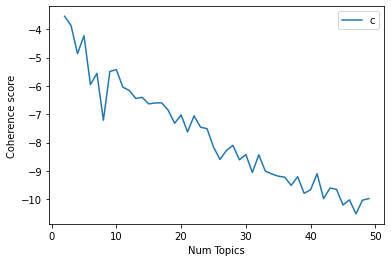

In [25]:
# Show graph
limit=50; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()# Print the coherence scores

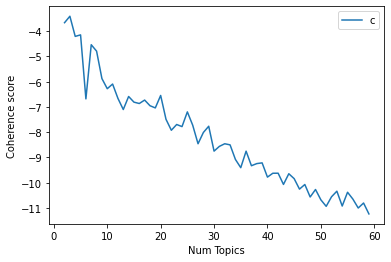

In [23]:
# Show graph
limit=60; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()# Print the coherence scores

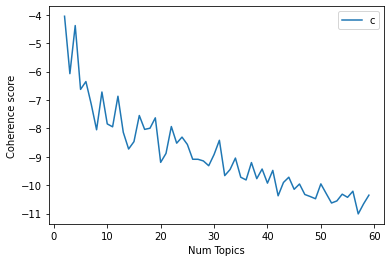

In [57]:
# Show graph
limit=60; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()# Print the coherence scores

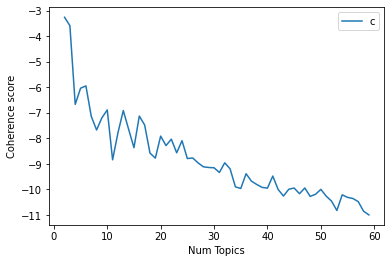

In [15]:
# Show graph
limit=60; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()# Print the coherence scores

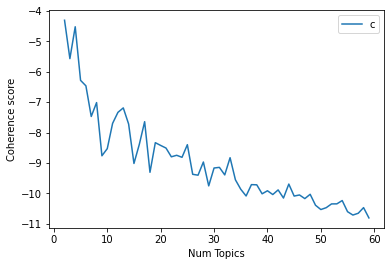

In [15]:
# Show graph
limit=60; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()# Print the coherence scores

In [16]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of -4.3068
Num Topics = 3  has Coherence Value of -5.5686
Num Topics = 4  has Coherence Value of -4.5209
Num Topics = 5  has Coherence Value of -6.2826
Num Topics = 6  has Coherence Value of -6.4619
Num Topics = 7  has Coherence Value of -7.4695
Num Topics = 8  has Coherence Value of -7.0129
Num Topics = 9  has Coherence Value of -8.7613
Num Topics = 10  has Coherence Value of -8.5269
Num Topics = 11  has Coherence Value of -7.6959
Num Topics = 12  has Coherence Value of -7.3339
Num Topics = 13  has Coherence Value of -7.1876
Num Topics = 14  has Coherence Value of -7.7174
Num Topics = 15  has Coherence Value of -9.0132
Num Topics = 16  has Coherence Value of -8.3876
Num Topics = 17  has Coherence Value of -7.6406
Num Topics = 18  has Coherence Value of -9.3039
Num Topics = 19  has Coherence Value of -8.3303
Num Topics = 20  has Coherence Value of -8.4211
Num Topics = 21  has Coherence Value of -8.5071
Num Topics = 22  has Coherence Value of -8.7946


In [24]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of -3.261
Num Topics = 3  has Coherence Value of -3.5901
Num Topics = 4  has Coherence Value of -6.6699
Num Topics = 5  has Coherence Value of -6.0378
Num Topics = 6  has Coherence Value of -5.9467
Num Topics = 7  has Coherence Value of -7.1342
Num Topics = 8  has Coherence Value of -7.6711
Num Topics = 9  has Coherence Value of -7.1937
Num Topics = 10  has Coherence Value of -6.8871
Num Topics = 11  has Coherence Value of -8.8384
Num Topics = 12  has Coherence Value of -7.7841
Num Topics = 13  has Coherence Value of -6.9108
Num Topics = 14  has Coherence Value of -7.6423
Num Topics = 15  has Coherence Value of -8.3646
Num Topics = 16  has Coherence Value of -7.1274
Num Topics = 17  has Coherence Value of -7.4742
Num Topics = 18  has Coherence Value of -8.5747
Num Topics = 19  has Coherence Value of -8.7731
Num Topics = 20  has Coherence Value of -7.9116
Num Topics = 21  has Coherence Value of -8.2824
Num Topics = 22  has Coherence Value of -8.0307
N

In [33]:
model_list[41]

In [29]:
# Select the model and print the topics #14
optimal_model = model_list[9]
model_topics = optimal_model.show_topics(formatted=False)
optimal_model.print_topics(num_words=20,num_topics=11)

[(0,
  '0.074*"bigrock" + 0.073*"product" + 0.040*"premium" + 0.029*"cookie" + 0.028*"powerful" + 0.027*"demand" + 0.018*"thread" + 0.016*"disgusting" + 0.015*"result" + 0.015*"auth" + 0.015*"excuse" + 0.015*"negative" + 0.014*"mile" + 0.014*"road" + 0.010*"thousand" + 0.009*"research" + 0.008*"bonus" + 0.007*"marketing" + 0.007*"cheap" + 0.007*"hundred"'),
 (1,
  '0.072*"brand" + 0.070*"domain" + 0.052*"startup" + 0.043*"name" + 0.030*"fashion" + 0.030*"domainforsale" + 0.029*"sale" + 0.027*"domainname" + 0.025*"website" + 0.023*"domainsforsale" + 0.019*"kid" + 0.015*"game" + 0.015*"domainnamesale" + 0.014*"portfolio" + 0.014*"beauty" + 0.013*"agency" + 0.012*"growth" + 0.012*"domainer" + 0.011*"brandable" + 0.011*"business"'),
 (2,
  '0.038*"time" + 0.037*"customer" + 0.028*"issue" + 0.024*"service" + 0.022*"support" + 0.018*"email" + 0.016*"site" + 0.016*"account" + 0.013*"website" + 0.012*"team" + 0.012*"request" + 0.012*"hour" + 0.011*"number" + 0.011*"month" + 0.010*"problem" + 0

In [19]:
# Select the model and print the topics #15
optimal_model = model_list[13]
model_topics = optimal_model.show_topics(formatted=False)
optimal_model.print_topics(num_words=20,num_topics=15)

[(0,
  '0.152*"website" + 0.042*"builder" + 0.023*"plugin" + 0.023*"launch" + 0.021*"site" + 0.020*"page" + 0.020*"browser" + 0.020*"system" + 0.018*"damage" + 0.013*"issue" + 0.013*"high" + 0.013*"check" + 0.012*"level" + 0.012*"help" + 0.012*"job" + 0.012*"language" + 0.011*"server" + 0.011*"hosting" + 0.011*"month" + 0.010*"responsibility"'),
 (1,
  '0.071*"size" + 0.067*"market" + 0.052*"volume" + 0.029*"government" + 0.028*"domainer" + 0.022*"common" + 0.022*"female" + 0.020*"federal" + 0.020*"retail" + 0.019*"active" + 0.018*"apple" + 0.015*"motivation" + 0.014*"girl" + 0.014*"sale" + 0.013*"ecommerce" + 0.013*"big" + 0.013*"virtual" + 0.013*"similar" + 0.012*"clothing" + 0.010*"dominio"'),
 (2,
  '0.035*"training" + 0.030*"crypto" + 0.027*"blockchain" + 0.022*"career" + 0.022*"mail" + 0.021*"interest" + 0.019*"internal" + 0.018*"reseller" + 0.018*"record" + 0.017*"utility" + 0.016*"school" + 0.015*"nasty" + 0.015*"technical" + 0.015*"consultant" + 0.015*"ethereum" + 0.012*"cool"

In [69]:
# Select the model and print the topics
optimal_model = model_list[40]
model_topics = optimal_model.show_topics(formatted=False)
optimal_model.print_topics(num_words=10,num_topics=42)

[(0,
  '0.112*"full" + 0.111*"video" + 0.062*"story" + 0.060*"friend" + 0.033*"entire" + 0.030*"partner" + 0.022*"excited" + 0.022*"one" + 0.020*"activity" + 0.020*"mind"'),
 (1,
  '0.152*"site" + 0.064*"page" + 0.047*"request" + 0.043*"access" + 0.042*"issue" + 0.039*"account" + 0.032*"client" + 0.030*"time" + 0.030*"error" + 0.024*"server"'),
 (2,
  '0.284*"domain" + 0.216*"name" + 0.036*"different" + 0.023*"premium" + 0.022*"nocode" + 0.018*"registrar" + 0.017*"whois" + 0.017*"place" + 0.016*"company" + 0.014*"screenshot"'),
 (3,
  '0.243*"website" + 0.098*"cheap" + 0.071*"builder" + 0.042*"domain" + 0.037*"browser" + 0.030*"info" + 0.029*"information" + 0.028*"cost" + 0.027*"option" + 0.020*"language"'),
 (4,
  '0.065*"contact" + 0.061*"idea" + 0.060*"need" + 0.056*"government" + 0.042*"signature" + 0.038*"free" + 0.032*"logo" + 0.028*"token" + 0.024*"contract" + 0.022*"ready"'),
 (5,
  '0.141*"domain" + 0.074*"transfer" + 0.072*"registrar" + 0.060*"large" + 0.048*"company" + 0.036

In [67]:
import pyLDAvis.gensim_models
import pandas as pd, numpy as np

In [22]:
# Select the model and print the topics
optimal_model = model_list[11]
model_topics = optimal_model.show_topics(formatted=False)
optimal_model.print_topics(num_words=10,num_topics=13)

[(0,
  '0.209*"domain" + 0.072*"name" + 0.043*"business" + 0.036*"market" + 0.026*"year" + 0.021*"measure" + 0.021*"sale" + 0.020*"vlog" + 0.019*"auction" + 0.019*"brand"'),
 (1,
  '0.042*"business" + 0.034*"request" + 0.024*"company" + 0.022*"people" + 0.020*"lawsuit" + 0.016*"first" + 0.015*"tool" + 0.014*"last" + 0.012*"training" + 0.012*"network"'),
 (2,
  '0.067*"renewal" + 0.053*"bigrock" + 0.049*"wordpress" + 0.033*"year" + 0.024*"kid" + 0.022*"season" + 0.019*"price" + 0.016*"fine" + 0.016*"demand" + 0.015*"real"'),
 (3,
  '0.045*"size" + 0.044*"rare" + 0.042*"trading" + 0.031*"year" + 0.027*"company" + 0.025*"open" + 0.025*"failure" + 0.023*"employee" + 0.022*"race" + 0.016*"common"'),
 (4,
  '0.062*"email" + 0.047*"customer" + 0.040*"time" + 0.036*"issue" + 0.031*"support" + 0.027*"service" + 0.023*"team" + 0.018*"problem" + 0.017*"hour" + 0.014*"month"'),
 (5,
  '0.079*"website" + 0.032*"site" + 0.025*"wordpress" + 0.023*"good" + 0.021*"plugin" + 0.020*"builder" + 0.019*"ser

In [28]:
# Visualize the topics #42 topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(optimal_model, doc_term_matrix, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.238908  0.015826       1        1  17.586641
9     -0.081638  0.196969       2        1  15.637413
7     -0.178981  0.012129       3        1  14.313601
4     -0.182165  0.071306       4        1  11.128753
6     -0.158952 -0.034143       5        1   9.993492
1      0.246057  0.155910       6        1   9.264349
3      0.287241  0.071921       7        1   6.046484
5      0.084614  0.088254       8        1   4.642156
10     0.032569 -0.238237       9        1   4.304982
8      0.048149 -0.203914      10        1   3.876801
0      0.142015 -0.136021      11        1   3.205327, topic_info=          Term          Freq         Total Category  logprob  loglift
3       domain  16046.000000  16046.000000  Default  30.0000  30.0000
556     social   2255.000000   2255.000000  Default  29.0000  29.0000
451     medium   2197.000000   2197.000000  Default  28.0000  28.0000
166      email   4054.000000   4054.000000  Default  27.0000  27.0000
8         name   5417.000000   5417.000000  Default  26.0000  26.0000
..         ...           ...           ...      ...      ...      ...
835      cheap     80.035221    955.650879  Topic11  -4.9469   0.9604
59   marketing     80.224078   1113.832837  Topic11  -4.9446   0.8096
34     service     67.365367   2791.918274  Topic11  -5.1193  -0.2840
3       domain     59.483267  16046.751884  Topic11  -5.2437  -2.1572
507      brand     51.989441   2671.806007  Topic11  -5.3783  -0.4991

[661 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
453       4  0.991298     ability
2107      6  0.989379    absolute
1844      4  0.986772       abuse
1844      8  0.009643       abuse
2487      1  0.992736  acceptable
...     ...       ...         ...
37        8  0.003480        year
37        9  0.001160        year
37       10  0.002320        year
37       11  0.007540        year
1965      7  0.995115     youtube

[1618 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 10, 8, 5, 7, 2, 4, 6, 11, 9, 1])

In [22]:
# Visualize the topics #15 topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(optimal_model, doc_term_matrix, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
12     0.229951 -0.065611       1        1  13.337919
13     0.096984 -0.138577       2        1  11.058164
3     -0.250499 -0.224889       3        1  10.837140
8      0.001476 -0.245297       4        1   9.979074
6      0.202646 -0.000561       5        1   8.283889
14     0.174861 -0.033080       6        1   8.256351
10     0.089654  0.000836       7        1   6.189884
5      0.059016  0.153609       8        1   5.973714
0      0.092642  0.092364       9        1   5.679831
11     0.006084  0.039554      10        1   4.676002
7     -0.072296  0.123593      11        1   3.685890
9     -0.125549  0.062169      12        1   3.297189
2     -0.058601  0.163966      13        1   3.217360
1     -0.192702  0.083793      14        1   2.901717
4     -0.253665 -0.011870      15        1   2.625876, topic_info=          Term          Freq         Total Category  logprob  loglift
3       domain  16888.000000  16888.000000  Default  30.0000  30.0000
166      email   4488.000000   4488.000000  Default  29.0000  29.0000
36     website   5993.000000   5993.000000  Default  28.0000  28.0000
523  wordpress   2715.000000   2715.000000  Default  27.0000  27.0000
8         name   5312.000000   5312.000000  Default  26.0000  26.0000
..         ...           ...           ...      ...      ...      ...
549     modern     66.809275    219.603022  Topic15  -4.9281   2.4498
76   brandable     72.690257    563.440496  Topic15  -4.8438   1.5919
507      brand     88.670576   2797.571858  Topic15  -4.6451   0.1882
61        sale     78.231194   2148.981488  Topic15  -4.7703   0.3267
8         name     78.262966   5312.134458  Topic15  -4.7699  -0.5779

[867 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
453       2  0.013866   ability
453      10  0.956762   ability
453      15  0.013866   ability
2107      1  0.967659  absolute
1844      4  0.139865     abuse
...     ...       ...       ...
37       14  0.005683      year
37       15  0.000284      year
247      11  0.982184      yoga
2195      2  0.968028     young
1965      8  0.992021   youtube

[2311 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[13, 14, 4, 9, 7, 15, 11, 6, 1, 12, 8, 10, 3, 2, 5])

In [24]:
# Select the model and print the topics
optimal_model = model_list[13]
model_topics = optimal_model.show_topics(formatted=False)
optimal_model.print_topics(num_words=10,num_topics=15)

[(0,
  '0.152*"website" + 0.042*"builder" + 0.023*"plugin" + 0.023*"launch" + 0.021*"site" + 0.020*"page" + 0.020*"browser" + 0.020*"system" + 0.018*"damage" + 0.013*"issue"'),
 (1,
  '0.071*"size" + 0.067*"market" + 0.052*"volume" + 0.029*"government" + 0.028*"domainer" + 0.022*"common" + 0.022*"female" + 0.020*"federal" + 0.020*"retail" + 0.019*"active"'),
 (2,
  '0.035*"training" + 0.030*"crypto" + 0.027*"blockchain" + 0.022*"career" + 0.022*"mail" + 0.021*"interest" + 0.019*"internal" + 0.018*"reseller" + 0.018*"record" + 0.017*"utility"'),
 (3,
  '0.085*"domain" + 0.074*"social" + 0.073*"medium" + 0.071*"brand" + 0.060*"startup" + 0.035*"domainforsale" + 0.035*"marketing" + 0.032*"sale" + 0.028*"name" + 0.027*"fashion"'),
 (4,
  '0.067*"pro" + 0.040*"parson" + 0.033*"hostinger" + 0.029*"startup" + 0.029*"short" + 0.024*"table" + 0.023*"trap" + 0.022*"food" + 0.022*"branch" + 0.022*"domain"'),
 (5,
  '0.125*"wordpress" + 0.073*"site" + 0.034*"website" + 0.028*"database" + 0.028*"us

In [18]:
# Visualize the topics #18 topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(optimal_model, doc_term_matrix, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
17     0.187110  0.063306       1        1  14.370024
6     -0.028612  0.298900       2        1  11.166706
12    -0.303488  0.205694       3        1  10.841517
16     0.142300  0.009350       4        1   6.885558
10     0.162402 -0.054262       5        1   5.991508
0      0.073917  0.115131       6        1   5.475114
5      0.119808  0.077163       7        1   5.463921
9      0.137036  0.000440       8        1   5.267921
15     0.089589 -0.055229       9        1   4.950004
3      0.061691 -0.016462      10        1   4.436552
2     -0.020108 -0.078481      11        1   4.124068
14    -0.030614  0.005064      12        1   3.558946
13     0.011231 -0.049374      13        1   3.549082
7     -0.103471 -0.066087      14        1   3.352164
11    -0.103326 -0.019896      15        1   2.906847
1     -0.121739 -0.230701      16        1   2.733198
8     -0.024744 -0.151696      17        1   2.730901
4     -0.248982 -0.052860      18        1   2.195968, topic_info=             Term          Freq         Total Category  logprob  loglift
3          domain  17007.000000  17007.000000  Default  30.0000  30.0000
8            name   5339.000000   5339.000000  Default  29.0000  29.0000
556        social   2812.000000   2812.000000  Default  28.0000  28.0000
451        medium   2730.000000   2730.000000  Default  27.0000  27.0000
36        website   5856.000000   5856.000000  Default  26.0000  26.0000
...           ...           ...           ...      ...      ...      ...
553        agency     58.776667    646.941384  Topic18  -4.8775   1.4200
90    development     31.163705    102.918627  Topic18  -5.5119   2.6239
3          domain     76.686772  17007.962336  Topic18  -4.6115  -1.5832
3264          tip     30.091295     97.544452  Topic18  -5.5470   2.6425
63        startup     25.758890   2487.183908  Topic18  -5.7024  -0.7516

[1013 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
453       7  0.975930    ability
68        1  0.659788       able
68        5  0.051055       able
68        6  0.025528       able
68        7  0.007855       able
...     ...       ...        ...
694      12  0.032558  yesterday
694      13  0.003618  yesterday
694      17  0.086821  yesterday
247      17  0.956710       yoga
1965     17  0.995523    youtube

[2759 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[18, 7, 13, 17, 11, 1, 6, 10, 16, 4, 3, 15, 14, 8, 12, 2, 9, 5])

In [17]:
# Select the model and print the topics #16
optimal_model = model_list[16]
model_topics = optimal_model.show_topics(formatted=False)
optimal_model.print_topics(num_words=20,num_topics=18)

[(0,
  '0.075*"domain" + 0.031*"video" + 0.025*"tough" + 0.025*"volume" + 0.023*"link" + 0.021*"right" + 0.017*"available" + 0.016*"system" + 0.016*"cheap" + 0.016*"registration" + 0.016*"site" + 0.016*"future" + 0.015*"potential" + 0.014*"page" + 0.012*"demand" + 0.011*"level" + 0.011*"search" + 0.011*"likely" + 0.011*"screenshot" + 0.010*"well"'),
 (1,
  '0.107*"wordpress" + 0.076*"provider" + 0.048*"order" + 0.044*"economy" + 0.041*"cpanel" + 0.032*"power" + 0.030*"detail" + 0.023*"final" + 0.021*"freelancer" + 0.019*"data" + 0.019*"upwork" + 0.019*"cheesecake" + 0.012*"hostgator" + 0.011*"source" + 0.011*"website" + 0.011*"energy" + 0.011*"blue" + 0.010*"open" + 0.009*"operation" + 0.007*"system"'),
 (2,
  '0.129*"website" + 0.062*"builder" + 0.024*"right" + 0.023*"tool" + 0.020*"cost" + 0.019*"type" + 0.019*"kind" + 0.018*"page" + 0.017*"language" + 0.016*"setup" + 0.015*"webhosting" + 0.015*"developer" + 0.014*"auth" + 0.014*"wordpress" + 0.014*"term" + 0.011*"music" + 0.011*"web

In [8]:
#Second Iteration with 7 topics
# Creating the object for LDA model using gensim library
LDA = gensim.models.ldamodel.LdaModel

# Build LDA model
lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=7, random_state=100,
                chunksize=1000, passes=50,iterations=100)


In [9]:
lda_model.print_topics()  #Topics with their keywords (scored from highest to lowest)

[(0,
  '0.024*"video" + 0.018*"news" + 0.017*"r" + 0.012*"right" + 0.011*"future" + 0.010*"internet" + 0.009*"check" + 0.009*"family" + 0.008*"ecommerce" + 0.008*"man"'),
 (1,
  '0.154*"email" + 0.033*"datum" + 0.027*"user" + 0.022*"address" + 0.021*"breach" + 0.017*"password" + 0.017*"detail" + 0.016*"account" + 0.015*"wordpress" + 0.014*"free"'),
 (2,
  '0.023*"rare" + 0.014*"offer" + 0.013*"class" + 0.013*"e" + 0.012*"step" + 0.012*"recent" + 0.010*"hacker" + 0.008*"logo" + 0.008*"podcast" + 0.008*"super"'),
 (3,
  '0.027*"customer" + 0.026*"service" + 0.025*"site" + 0.022*"time" + 0.020*"website" + 0.017*"support" + 0.015*"day" + 0.014*"issue" + 0.012*"company" + 0.011*"year"'),
 (4,
  '0.081*"web" + 0.059*"website" + 0.055*"wordpress" + 0.039*"cheap" + 0.037*"bigrock" + 0.036*"amp" + 0.013*"use" + 0.013*"site" + 0.013*"easy" + 0.012*"bid"'),
 (5,
  '0.247*"domain" + 0.062*"name" + 0.028*"registration" + 0.023*"com" + 0.019*"year" + 0.019*"sale" + 0.017*"registrar" + 0.016*"busines

In [20]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, doc_term_matrix, dictionary)
vis

NameError: name 'lda_model' is not defined

In [ ]:
print('\nPerplexity: ', lda_model.log_perplexity(doc_term_matrix,total_docs=10000))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
from gensim.models.coherencemodel import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, texts=tokenized_reviews, dictionary=dictionary , coherence='c_v')#'u_mass'
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -8.844895913450683


In [11]:
#Third Iteration
# Creating the object for LDA model using gensim library
LDA = gensim.models.ldamodel.LdaModel

# Build LDA model
lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=7, random_state=100,
                chunksize=1000, passes=50,iterations=100)

In [12]:
lda_model.print_topics()  #Topics with their keywords (scored from highest to lowest)

[(0,
  '0.024*"video" + 0.018*"news" + 0.017*"r" + 0.012*"right" + 0.011*"future" + 0.010*"internet" + 0.009*"check" + 0.009*"family" + 0.008*"ecommerce" + 0.008*"man"'),
 (1,
  '0.154*"email" + 0.033*"datum" + 0.027*"user" + 0.022*"address" + 0.021*"breach" + 0.017*"password" + 0.017*"detail" + 0.016*"account" + 0.015*"wordpress" + 0.014*"free"'),
 (2,
  '0.023*"rare" + 0.014*"offer" + 0.013*"class" + 0.013*"e" + 0.012*"step" + 0.012*"recent" + 0.010*"hacker" + 0.008*"logo" + 0.008*"podcast" + 0.008*"super"'),
 (3,
  '0.027*"customer" + 0.026*"service" + 0.025*"site" + 0.022*"time" + 0.020*"website" + 0.017*"support" + 0.015*"day" + 0.014*"issue" + 0.012*"company" + 0.011*"year"'),
 (4,
  '0.081*"web" + 0.059*"website" + 0.055*"wordpress" + 0.039*"cheap" + 0.037*"bigrock" + 0.036*"amp" + 0.013*"use" + 0.013*"site" + 0.013*"easy" + 0.012*"bid"'),
 (5,
  '0.247*"domain" + 0.062*"name" + 0.028*"registration" + 0.023*"com" + 0.019*"year" + 0.019*"sale" + 0.017*"registrar" + 0.016*"busines

In [21]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, doc_term_matrix, dictionary)
vis

NameError: name 'lda_model' is not defined

In [14]:
print('\nPerplexity: ', lda_model.log_perplexity(doc_term_matrix,total_docs=10000))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
from gensim.models.coherencemodel import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, texts=tokenized_reviews, dictionary=dictionary , coherence='u_mass')#'u_mass'
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -8.844895913450683

Coherence Score:  -7.140638539793697


In [25]:
#Saving the model
from gensim.test.utils import datapath

In [68]:
# Select the model and print the topics
optimal_model = model_list[12]
model_topics = optimal_model.show_topics(formatted=False)
optimal_model.print_topics(num_words=10,num_topics=14)

[(0,
  '0.040*"year" + 0.030*"market" + 0.026*"platform" + 0.024*"people" + 0.023*"trading" + 0.022*"rare" + 0.020*"tough" + 0.018*"elementor" + 0.016*"buyer" + 0.015*"report"'),
 (1,
  '0.049*"customer" + 0.047*"request" + 0.046*"datum" + 0.022*"service" + 0.022*"user" + 0.018*"server" + 0.018*"damage" + 0.018*"agent" + 0.015*"team" + 0.014*"fact"'),
 (2,
  '0.039*"tool" + 0.036*"website" + 0.021*"first" + 0.021*"plugin" + 0.020*"measure" + 0.019*"site" + 0.019*"page" + 0.015*"time" + 0.014*"wordpress" + 0.014*"project"'),
 (3,
  '0.034*"email" + 0.027*"domain" + 0.021*"account" + 0.021*"service" + 0.020*"breach" + 0.018*"billion" + 0.018*"customer" + 0.016*"free" + 0.016*"namecheap" + 0.015*"security"'),
 (4,
  '0.040*"time" + 0.028*"issue" + 0.027*"domain" + 0.025*"year" + 0.025*"customer" + 0.023*"support" + 0.020*"email" + 0.019*"account" + 0.019*"service" + 0.019*"last"'),
 (5,
  '0.115*"email" + 0.041*"database" + 0.036*"true" + 0.036*"vlog" + 0.030*"future" + 0.022*"chance" + 0

In [69]:
#saving model to disk.


optimal_model.save('lda_model/LDA_14_topics')

In [77]:
string=''

In [ ]:
string.

In [ ]:
string=''
for i in list(range(16,60,1)):
    optimal_model = model_list[i-2]
    model_topics = optimal_model.show_topics(formatted=False)
    optimal_model.print_topics(num_words=10,num_topics=i)
    string='lda_model/LDA_'+str(i)+'_topics'
    optimal_model.save(string)
    string=''

In [ ]:
# loading model from disk

from gensim import  models

lda = models.ldamodel.LdaModel.load('LDA_15_topics')

In [81]:
# Select the model and print the topics
optimal_model = model_list[57]
model_topics = lda.show_topics(formatted=False)
lda.print_topics(num_words=10,num_topics=59)

[(0,
  '0.152*"website" + 0.042*"builder" + 0.023*"plugin" + 0.023*"launch" + 0.021*"site" + 0.020*"page" + 0.020*"browser" + 0.020*"system" + 0.018*"damage" + 0.013*"issue"'),
 (1,
  '0.071*"size" + 0.067*"market" + 0.052*"volume" + 0.029*"government" + 0.028*"domainer" + 0.022*"common" + 0.022*"female" + 0.020*"federal" + 0.020*"retail" + 0.019*"active"'),
 (2,
  '0.035*"training" + 0.030*"crypto" + 0.027*"blockchain" + 0.022*"career" + 0.022*"mail" + 0.021*"interest" + 0.019*"internal" + 0.018*"reseller" + 0.018*"record" + 0.017*"utility"'),
 (3,
  '0.085*"domain" + 0.074*"social" + 0.073*"medium" + 0.071*"brand" + 0.060*"startup" + 0.035*"domainforsale" + 0.035*"marketing" + 0.032*"sale" + 0.028*"name" + 0.027*"fashion"'),
 (4,
  '0.067*"pro" + 0.040*"parson" + 0.033*"hostinger" + 0.029*"startup" + 0.029*"short" + 0.024*"table" + 0.023*"trap" + 0.022*"food" + 0.022*"branch" + 0.022*"domain"'),
 (5,
  '0.125*"wordpress" + 0.073*"site" + 0.034*"website" + 0.028*"database" + 0.028*"us

In [35]:
# Visualize the topics #15 topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda, doc_term_matrix, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
12     0.229951 -0.065611       1        1  13.353096
13     0.096984 -0.138577       2        1  11.050614
3     -0.250499 -0.224889       3        1  10.839281
8      0.001476 -0.245297       4        1   9.980399
6      0.202646 -0.000561       5        1   8.273433
14     0.174861 -0.033080       6        1   8.237721
10     0.089654  0.000836       7        1   6.201171
5      0.059016  0.153609       8        1   5.967380
0      0.092642  0.092364       9        1   5.688315
11     0.006084  0.039554      10        1   4.682245
7     -0.072296  0.123593      11        1   3.692834
9     -0.125549  0.062169      12        1   3.294395
2     -0.058601  0.163966      13        1   3.214497
1     -0.192702  0.083793      14        1   2.899435
4     -0.253665 -0.011870      15        1   2.625184, topic_info=          Term          Freq         Total Category  logprob  loglift
3       domain  16888.000000  16888.000000  Default  30.0000  30.0000
166      email   4496.000000   4496.000000  Default  29.0000  29.0000
36     website   5996.000000   5996.000000  Default  28.0000  28.0000
523  wordpress   2712.000000   2712.000000  Default  27.0000  27.0000
8         name   5312.000000   5312.000000  Default  26.0000  26.0000
..         ...           ...           ...      ...      ...      ...
549     modern     66.791681    219.615811  Topic15  -4.9281   2.4497
76   brandable     72.671113    563.519676  Topic15  -4.8438   1.5918
507      brand     88.647224   2798.085797  Topic15  -4.6451   0.1880
61        sale     78.210591   2149.162645  Topic15  -4.7703   0.3266
8         name     78.242355   5312.813596  Topic15  -4.7699  -0.5780

[867 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
453       2  0.013848   ability
453      10  0.955542   ability
453      15  0.013848   ability
2107      1  0.966589  absolute
1844      4  0.140013     abuse
...     ...       ...       ...
37       14  0.005685      year
37       15  0.000284      year
247      11  0.980397      yoga
2195      2  0.968673     young
1965      8  0.993068   youtube

[2311 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[13, 14, 4, 9, 7, 15, 11, 6, 1, 12, 8, 10, 3, 2, 5])